# Machine Learning in Python - Project 1

Due Friday, Feb 28th by 4 pm.

*Include contributors names in notebook metadata or here*

## Setup

*Install any packages here, define any functions if neeed, and load data*

In [3]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold

In [4]:
# Load data in easyshare.csv
d = pd.read_csv("adnidata.csv")
d.head()

,Unnamed: 0,RID,ADAS13.bl,ADAS13.m24,AGE,DX.bl,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,1,3,31.00,37.67,81.3,AD,Male,18,Not Hisp/Latino,White,Married,1.0,84599.0,5319.0,1129834.0,1791.0,15506.0,18422.0,1.920691e+06
1,2,5,14.67,11.00,73.7,CN,Male,16,Not Hisp/Latino,White,Married,0.0,34062.0,7075.0,1116633.0,4433.0,24788.0,21614.0,1.640766e+06
2,3,6,25.67,22.67,80.4,LMCI,Female,13,Not Hisp/Latino,White,Married,0.0,39826.0,5348.0,927510.0,2277.0,17963.0,17802.0,1.485834e+06
3,4,7,40.33,47.00,75.4,AD,Male,10,Hisp/Latino,More than one,Married,1.0,25704.0,6729.0,875798.0,2050.0,12063.0,15374.0,1.353519e+06
4,5,10,24.33,30.33,73.9,AD,Female,12,Not Hisp/Latino,White,Married,1.0,26820.0,5485.0,1033542.0,2676.0,16761.0,19741.0,1.471184e+06


In [5]:
# For general info 
d.info()

# For the summary statistics
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1038 non-null   int64  
 1   RID          1038 non-null   int64  
 2   ADAS13.bl    1038 non-null   float64
 3   ADAS13.m24   1038 non-null   float64
 4   AGE          1038 non-null   float64
 5   DX.bl        1038 non-null   object 
 6   PTGENDER     1038 non-null   object 
 7   PTEDUCAT     1038 non-null   int64  
 8   PTETHCAT     1038 non-null   object 
 9   PTRACCAT     1038 non-null   object 
 10  PTMARRY      1038 non-null   object 
 11  APOE4        1033 non-null   float64
 12  Ventricles   891 non-null    float64
 13  Hippocampus  891 non-null    float64
 14  WholeBrain   890 non-null    float64
 15  Entorhinal   891 non-null    float64
 16  Fusiform     891 non-null    float64
 17  MidTemp      891 non-null    float64
 18  ICV          1030 non-null   float64
dtypes: flo

,Unnamed: 0,RID,ADAS13.bl,ADAS13.m24,AGE,PTEDUCAT,APOE4,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1033.000000,891.000000,891.000000,8.900000e+02,891.000000,891.000000,891.000000,1.030000e+03
mean,519.500000,1957.896917,15.644123,18.363025,74.062717,15.963391,0.540174,38604.586981,6848.867565,1.026765e+06,3514.277217,17322.850730,19618.152637,1.539285e+06
std,299.789093,1678.408345,8.530947,13.073851,7.018850,2.831598,0.656351,21781.692877,1195.621551,1.115823e+05,792.695809,2740.084064,3037.185011,1.631243e+05
min,1.000000,3.000000,0.000000,0.000000,55.000000,6.000000,0.000000,5650.000000,3548.000000,7.388130e+05,1426.000000,8991.000000,10234.000000,1.116279e+06
25%,260.250000,557.250000,9.000000,8.670000,70.000000,14.000000,0.000000,23139.500000,5998.000000,9.519980e+05,2971.500000,15469.000000,17605.500000,1.423128e+06
50%,519.500000,1173.000000,14.000000,15.000000,73.950000,16.000000,0.000000,33596.000000,6906.000000,1.025733e+06,3568.000000,17255.000000,19531.000000,1.526441e+06
75%,778.750000,4141.750000,21.000000,25.670000,79.300000,18.000000,1.000000,48682.500000,7692.500000,1.099261e+06,4084.000000,19004.500000,21666.000000,1.645128e+06
max,1038.000000,4696.000000,51.000000,71.000000,91.400000,20.000000,2.000000,147064.000000,10769.000000,1.443991e+06,5731.000000,26280.000000,29435.000000,2.072473e+06


In [7]:
# helper function
def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available. This function is extracted from workshop5 code.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])


def model_fit(m, X, y, plot = False):
    """Returns the mean squared error, root mean squared error and R^2 value of a fitted model based 
    on provided X and y values. This function is also extracted from workshop5 code.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    MSE = mean_squared_error(y, y_hat)
    RMSE = np.sqrt(mean_squared_error(y, y_hat))
    Rsqr = r2_score(y, y_hat)
    
    Metrics = (round(MSE, 4), round(RMSE, 4), round(Rsqr, 4))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Observed vs Fitted values")
        
        plt.subplot(122)
        sns.scatterplot(x='y_hat', y='resid', data=res).set_title("Fitted values vs Residuals")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model (MSE, RMSE, Rsq) = " + str(Metrics), fontsize=14)
        plt.show()
    
    return MSE, RMSE, Rsqr

# Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a professional body (e.g. Alzheimer's Association, Health Institutes and/or other Charities on dementia and ageing).*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

# Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft and the appropriate type of plot and summary for each variable type - your report should include figures but they should be as focused and impactful as possible.*

*You should also split your data into training and testing sets, ideally before you look to much into the features and relationships with the target*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. Feature engineering that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

In [8]:
# 读取数据
d = pd.read_csv("adnidata.csv")

# 处理缺失值（用中位数填充数值列）
d.fillna(d.median(numeric_only=True), inplace=True)

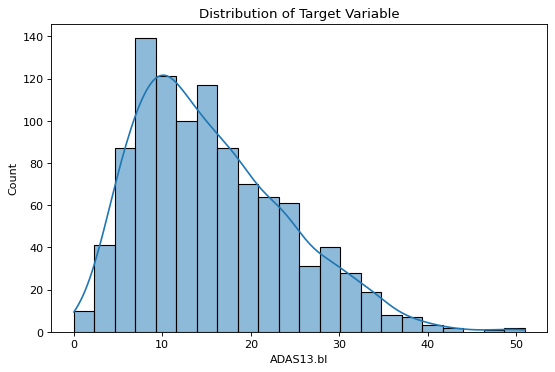

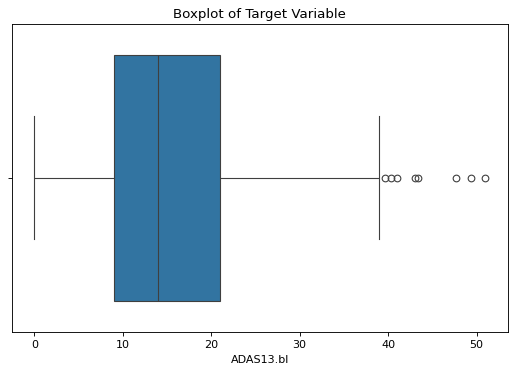

In [9]:
# RID	ADAS13.bl	ADAS13.m24	AGE	DX.bl	PTGENDER	PTEDUCAT	PTETHCAT	PTRACCAT	PTMARRY	APOE4	Ventricles	Hippocampus	WholeBrain	Entorhinal	Fusiform	MidTemp	ICV
sns.histplot(d['ADAS13.bl'], kde=True)
plt.title("Distribution of Target Variable")
plt.show()

sns.boxplot(x=d['ADAS13.bl'])
plt.title("Boxplot of Target Variable")
plt.show()


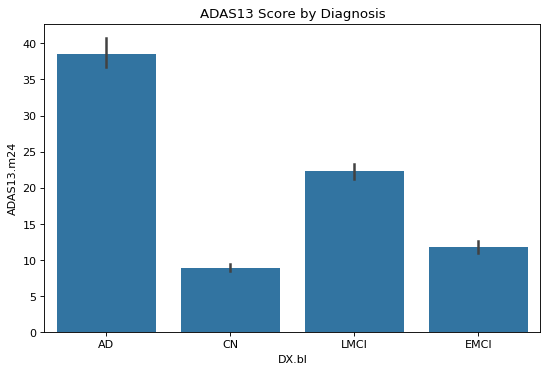

In [10]:
# 探究类别变量
sns.barplot(x='DX.bl', y='ADAS13.m24', data=d)
plt.title('ADAS13 Score by Diagnosis')
plt.show()

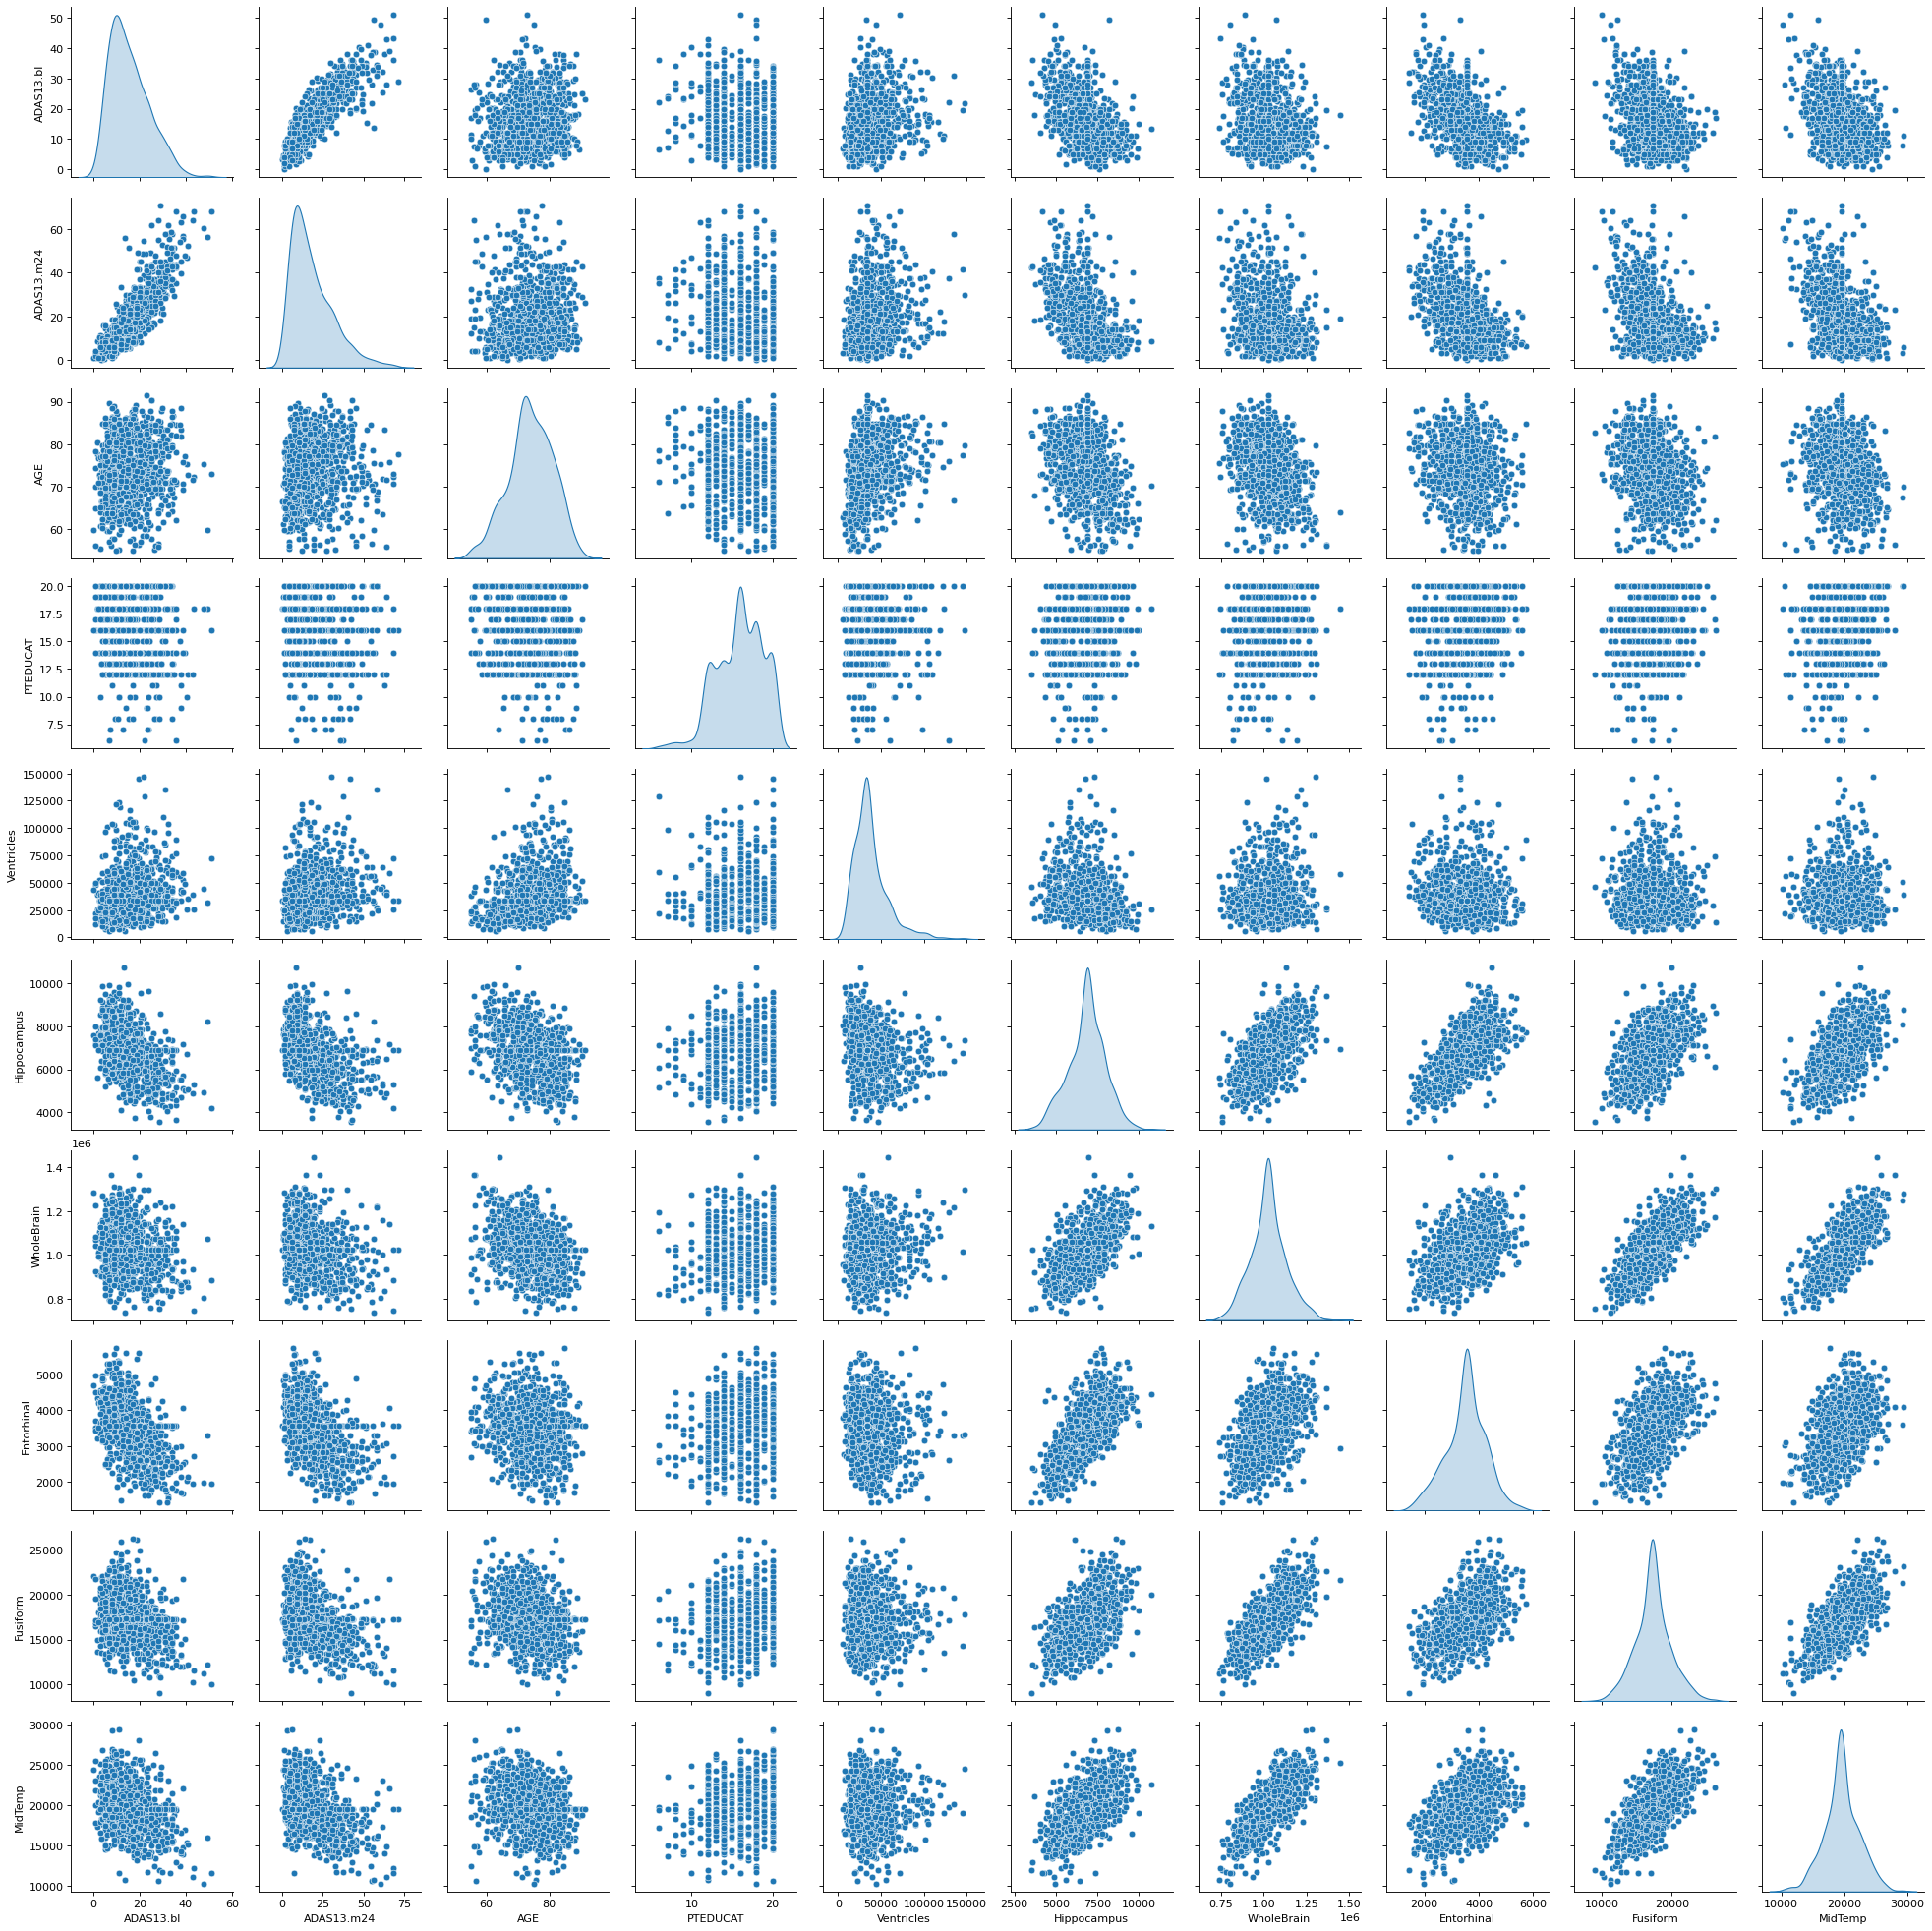

In [11]:
# using pairplot to plot all numeric features
sns.pairplot(d, vars= ['ADAS13.bl','ADAS13.m24','AGE','PTEDUCAT','Ventricles','Hippocampus','WholeBrain','Entorhinal','Fusiform','MidTemp'],diag_kind='kde')
plt.show()

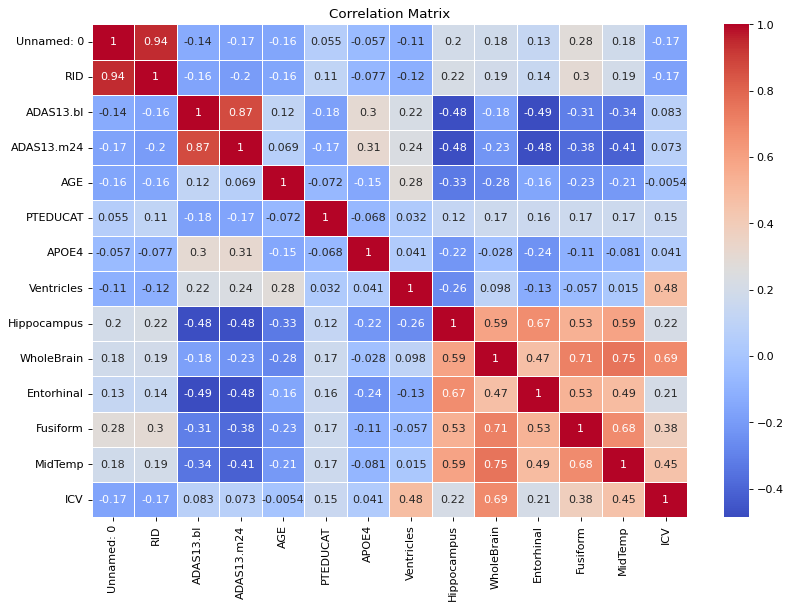

In [12]:
numeric_data = d.select_dtypes(include=['number'])

# 计算相关矩阵
corr_matrix = numeric_data.corr()

# 绘制热力图
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


通过分析pdf中的数据字典以及分析pairplot和热力图，RID和unnamed0是索引不用来拟合模型，ADAS13.m24是需要预测的变量也不用来拟合模型

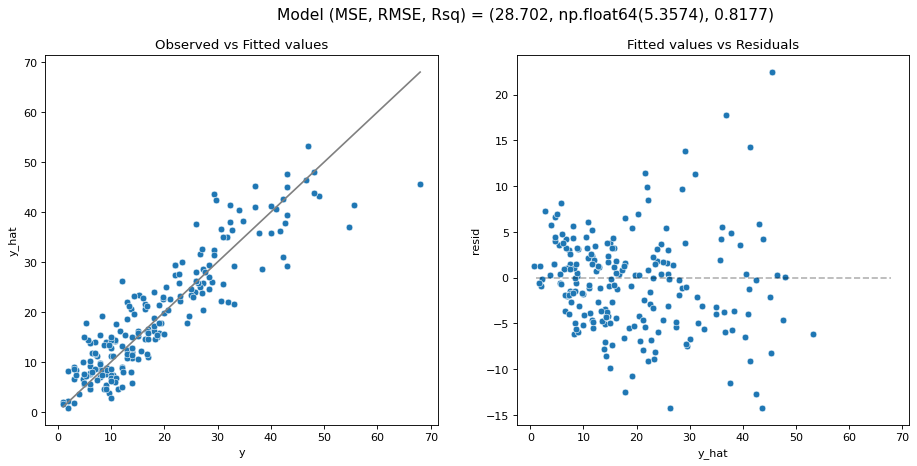

Index(['ADAS13.bl', 'AGE', 'PTEDUCAT', 'APOE4', 'Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX.bl_CN',
       'DX.bl_EMCI', 'DX.bl_LMCI', 'PTGENDER_Male', 'PTMARRY_Married',
       'PTMARRY_Never married', 'PTMARRY_Unknown', 'PTMARRY_Widowed',
       'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian',
       'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
       'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White'],
      dtype='object')


In [13]:
# model1 先直接拟合一下看看效果
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

# 读取数据
d = pd.read_csv("adnidata.csv")

# 处理缺失值（用中位数填充数值列）
d.fillna(d.median(numeric_only=True), inplace=True)
# d.dropna(axis=1, inplace=True)


# 处理类别变量（独热编码）
# d = pd.get_dummies(d, columns=['DX.bl', 'APOE4','PTGENDER', 'PTMARRY', 'PTETHCAT', 'PTRACCAT'], drop_first=True)
d = pd.get_dummies(d, columns=['DX.bl','PTGENDER', 'PTMARRY', 'PTETHCAT', 'PTRACCAT'], drop_first=True)

# 这里可以尝试目标编码
# encoder = ce.TargetEncoder(cols=['DX.bl', 'PTMARRY', 'APOE4'])
# d_encoded = encoder.fit_transform(d, d['ADAS13.m24'])

# 选择特征和目标变量
# features = ['ADAS13.bl','PTEDUCAT', 'AGE','Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV']
features_todrop = ['Unnamed: 0','RID','ADAS13.m24']
features = [col for col in d.columns if col not in features_todrop]
X = d[features]
y = d['ADAS13.m24']

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

model_fit(model,X_test,y_test,plot=True)
print(X.columns)

In [14]:
# Feature Engineer
# 指定要计算相关性的特征名
selected_features = ['ADAS13.bl','PTEDUCAT', 'AGE','APOE4','Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV']

# 计算指定特征与目标变量的相关性
correlation_matrix = d[selected_features + ['ADAS13.m24']].corr()

# 提取每个指定特征与目标变量的相关性
correlation_with_y = correlation_matrix['ADAS13.m24'].sort_values(ascending=False)

# 显示相关性结果
print(correlation_with_y)


ADAS13.m24     1.000000
ADAS13.bl      0.866910
APOE4          0.313392
Ventricles     0.237050
ICV            0.072711
AGE            0.069437
PTEDUCAT      -0.165225
WholeBrain    -0.230552
Fusiform      -0.378886
MidTemp       -0.413917
Entorhinal    -0.475666
Hippocampus   -0.478414
Name: ADAS13.m24, dtype: float64


通过观察可发现，AGE和PTEDUCAT对预测值的影响非常小，我们考虑在拟合时去掉这两个变量

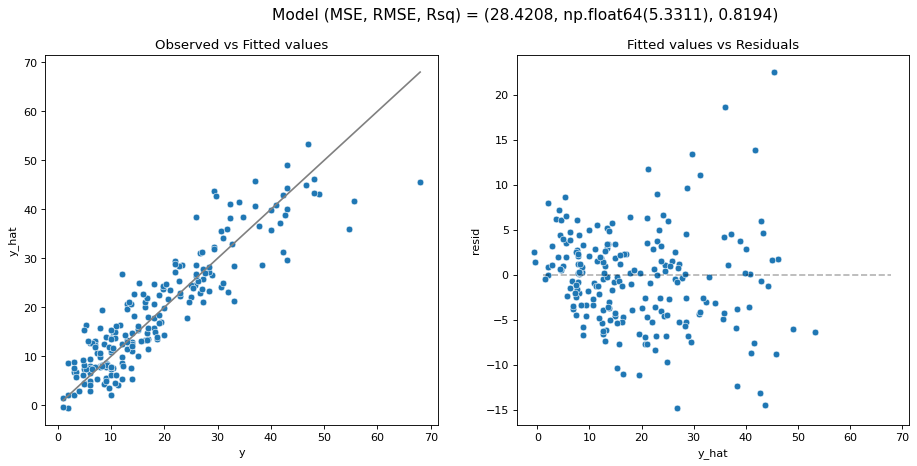

Index(['ADAS13.bl', 'APOE4', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX.bl_CN', 'DX.bl_EMCI',
       'DX.bl_LMCI', 'PTGENDER_Male', 'PTMARRY_Married',
       'PTMARRY_Never married', 'PTMARRY_Unknown', 'PTMARRY_Widowed',
       'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian',
       'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
       'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White'],
      dtype='object')
(1038, 25)


In [15]:
# model2 去除相关系数小的几个变量
# 读取数据
d = pd.read_csv("adnidata.csv")
# 处理缺失值（用中位数填充数值列）
d.fillna(d.median(numeric_only=True), inplace=True)
# 处理类别变量（独热编码）
d = pd.get_dummies(d, columns=['DX.bl','PTGENDER', 'PTMARRY', 'PTETHCAT', 'PTRACCAT'], drop_first=True)

# 删除这些变量
features_todrop = ['ADAS13.m24','AGE','PTEDUCAT','Unnamed: 0','RID']
features = [col for col in d.columns if col not in features_todrop]
# 创建新特征集
X = d[features]

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练线性回归模型
model2 = LinearRegression()
model2.fit(X_train, y_train)

model_fit(model2,X_test,y_test,plot=True)
print(X.columns)
print(X.shape)

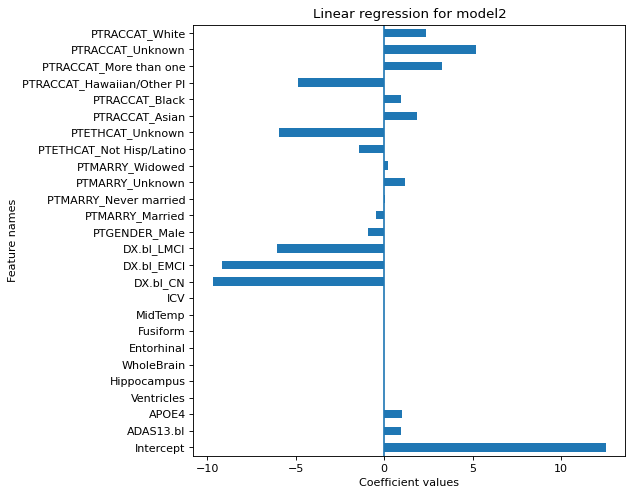

In [16]:
# 画model2的各个系数
# 获取模型系数并转换为 DataFrame
m2_coef = pd.DataFrame(get_coefs(model2), index=['Intercept'] + list(X.columns), columns=["Coefficient"])

# 画出系数的条形图
m2_coef.plot.barh(figsize=(9, 7), legend=False)
plt.title("Linear regression for model2")
plt.axvline(x=0)
plt.xlabel("Coefficient values")
plt.ylabel("Feature names")  # 添加纵坐标名称
plt.subplots_adjust(left=0.3)  # 调整布局，使特征名称完整显示
plt.show()

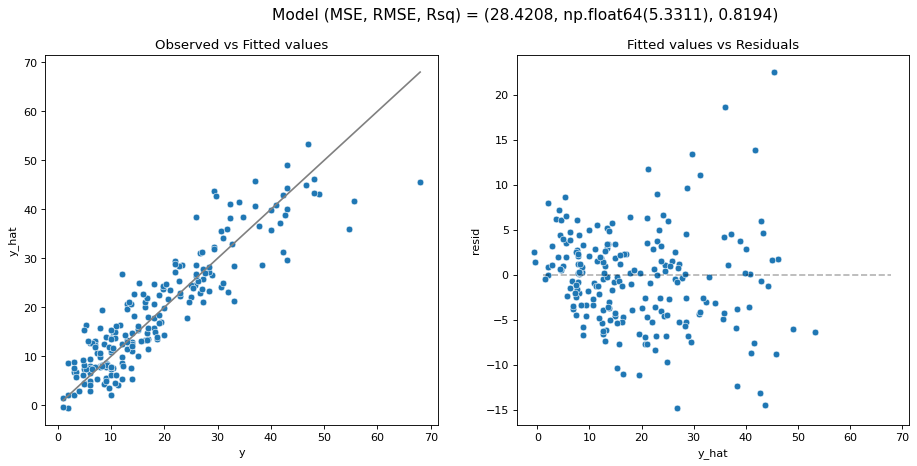

(28.42078680974702, np.float64(5.331114968723431), 0.8194474401255131)

In [17]:
# model3 标准化处理
from sklearn.preprocessing import StandardScaler
# 初始化标准化器
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 检查标准化结果
X_scaled_d = pd.DataFrame(X_scaled, columns=X.columns)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled_d, y, test_size=0.2, random_state=42)

# 初始化并训练线性回归模型
model3 = LinearRegression()
model3.fit(X_train, y_train)

model_fit(model3,X_test,y_test,plot=True)


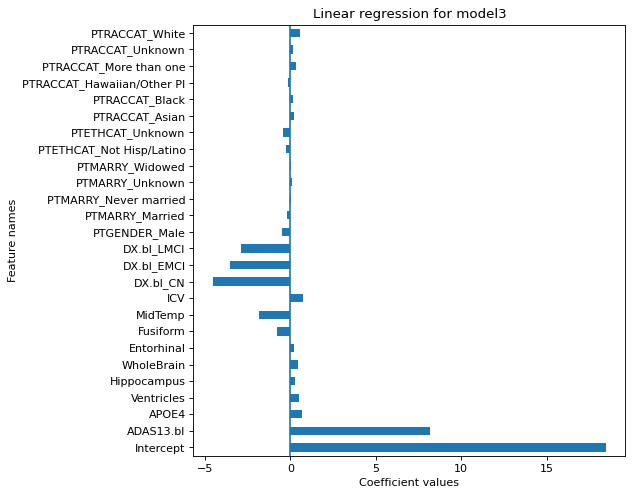

In [18]:
# 画model3的各个模型系数
# 获取模型系数并转换为 DataFrame
m3_coef = pd.DataFrame(get_coefs(model3), index=['Intercept'] + list(X.columns), columns=["Coefficient"])

# 画出系数的条形图
m3_coef.plot.barh(figsize=(9, 7), legend=False)
plt.title("Linear regression for model3")
plt.axvline(x=0)
plt.xlabel("Coefficient values")
plt.ylabel("Feature names")  # 添加纵坐标名称
plt.subplots_adjust(left=0.3)  # 调整布局，使特征名称完整显示
plt.show()

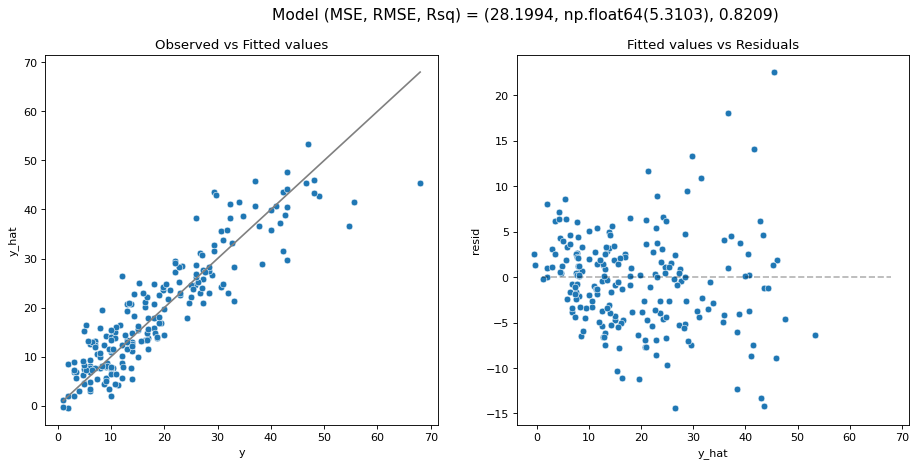

Index(['ADAS13.bl', 'APOE4', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX.bl_CN', 'DX.bl_EMCI',
       'DX.bl_LMCI', 'PTGENDER_Male', 'PTMARRY_Married',
       'PTMARRY_Never married', 'PTMARRY_Unknown', 'PTMARRY_Widowed',
       'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian',
       'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
       'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White'],
      dtype='object')
(1038, 25)


In [19]:
# modle 4 计算各项脑内组织的体积占比，消除不同人脑容量不同的误差，用百分比来拟合
# 读取数据
d = pd.read_csv("adnidata.csv")
# 处理缺失值（用中位数填充数值列）
d.fillna(d.median(numeric_only=True), inplace=True)
# 处理类别变量（独热编码）
d = pd.get_dummies(d, columns=['DX.bl','PTGENDER', 'PTMARRY', 'PTETHCAT', 'PTRACCAT'], drop_first=True)

# 求脑体积占比，利用百分比减少头部大小的差异
d['WholeBrain'] = d['WholeBrain'] / d['ICV']
d['Ventricles'] = d['Ventricles'] / d['ICV']
d['Hippocampus'] = d['Hippocampus'] / d['WholeBrain']
d['Entorhinal'] = d['Entorhinal'] / d['WholeBrain']
d['MidTemp'] = d['MidTemp'] / d['WholeBrain']
d['Fusiform'] = d['Fusiform'] / d['WholeBrain']


# 删除这些变量
features_todrop = ['ADAS13.m24','AGE','PTEDUCAT','Unnamed: 0','RID']
features = [col for col in d.columns if col not in features_todrop]
# 创建新特征集
X = d[features]

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练线性回归模型
model4 = LinearRegression()
model4.fit(X_train, y_train)

model_fit(model4,X_test,y_test,plot=True)
print(X.columns)
print(X.shape)

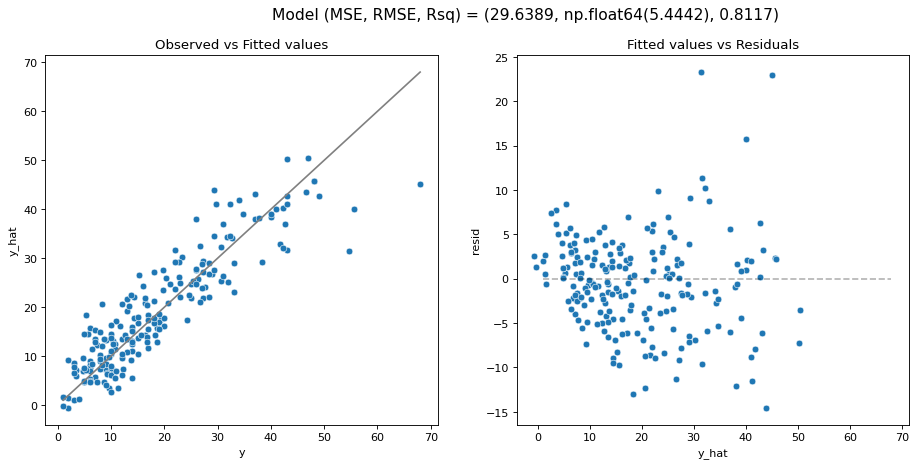

Lasso 保留的特征:
ADAS13.bl          1.108825
APOE4              0.695175
Hippocampus       -0.000128
Entorhinal         0.000287
Fusiform          -0.000296
MidTemp           -0.000424
ICV                0.000013
DX.bl_CN          -4.786392
DX.bl_EMCI        -4.944372
DX.bl_LMCI        -2.304832
PTGENDER_Male     -0.795022
PTMARRY_Married   -0.082053
dtype: float64


In [20]:
# Lasso 方法 尝试不同的参数1，0.1，0.01，0.001后发现0.1最好
# 数据集延用上面model4的数据集，即计算颅内体积占比的数据集
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 初始化 Lasso 回归模型，并设置 alpha 值（正则化强度）
lasso_model = Lasso(alpha=0.1)  # 你可以尝试不同的 alpha 值

# 训练 Lasso 模型
lasso_model.fit(X_train, y_train)

model_fit(lasso_model, X_test, y_test, plot=True)

# 查看 Lasso 选择的重要特征（系数不为 0 的）
lasso_coef = pd.Series(lasso_model.coef_, index=X_train.columns)
print("Lasso 保留的特征:")
print(lasso_coef[lasso_coef != 0])  # 只显示非零系数

# Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine, tune, and fit that model. You are strongly encouraged to explore different models (e.g. linear regression, interaction terms, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should briefly mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validating it.*

*For example if you considered a linear regression model with interactions, a polynomial regression, and a lasso model and ultimately settled on the lasso approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail the development of the lasso model in terms of features used and additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

*Finally, you should also provide comparison of your model with baseline linear regression model on the test data but only briefly describe the baseline model considered*

# Discussion & Conclusions

*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, estimated parameters and relationships, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a health official or charity director, who is understands the pressing challenges associated with ageining and dementia but may only have university level mathematics (not necessarily postgraduate statistics or machine learning). Your goal should be to highlight to this audience how your model can useful. You should also mention potential limitations of your model.*

*Finally, you should include recommendations on factors that may increase the risk of higher cognitive decline, which may be useful for identiying individuals that may benefit more from any proposed drugs or therapies.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

# Generative AI statement

*Include a statement on how generative AI was used in the project and report.*

# References

*Include references if any*

In [54]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project1.ipynb

[NbConvertApp] Converting notebook project1.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'project1.ipynb'
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/nbconvert/nbconvertapp.py", line 487, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/nbconvert/exporters/templateexporter.py", line 386, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore[return-value]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/nbconvert/exporters/exporter.py", line 201, in from_filename
    return self.from_file(f, resources=resources, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/nbconvert/exporters/templateexporter.py", li